In [51]:
import numpy as np
import plotly.plotly as py
import matplotlib.pyplot as plt
from pandas_datareader import data
import pandas as pd
from datetime import datetime, timedelta
from mpl_finance import candlestick_ohlc
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


%matplotlib inline

In [2]:
#Find today's date
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2018-10-26


In [32]:
#Find three years from today
three_year = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
print(three_year)

2015-10-27


In [82]:
#Daily Data
tickers = ['AAPL']

dict = {}
# User pandas_reader.data.DataReader to load the desired data. As simple as that.

for ticker in tickers:
    panel_data = data.DataReader(ticker, 'iex', three_year, today)
    panel_data["Ticker"] = ticker
    panel_data["Moving Average"] = panel_data["close"].rolling(window=5).mean()
    panel_data["Date"]=panel_data.index
    panel_data["Date"]=pd.to_datetime(panel_data["Date"])
    panel_data["Date"] = panel_data["Date"].apply(mdates.date2num)

In [83]:
panel_data.head()

,open,high,low,close,volume,Ticker,Moving Average,Date
date,,,,,,,,
2015-10-27,109.3720,110.4524,108.0356,108.5664,69884400,AAPL,NaN,735898.0
2015-10-28,110.8221,113.0683,109.9975,113.0398,85551352,AAPL,NaN,735899.0
2015-10-29,112.4996,114.3857,112.0921,114.2340,51227334,AAPL,NaN,735900.0
2015-10-30,114.6700,114.8880,113.2104,113.2578,49365254,AAPL,NaN,735901.0
2015-11-02,113.6085,115.0207,113.3621,114.8501,32203267,AAPL,112.78962,735904.0


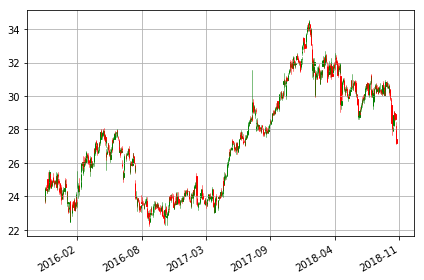

In [66]:
ohlc= panel_data[['Date', 'open', 'high', 'low','close']].copy()

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


fig.autofmt_xdate()
fig.tight_layout()
plt.grid()
plt.savefig(f"{tickers}candlestick.png")
plt.show()